In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Introducción

## Contenido

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Python - Proyectos propios/marketing_campaign.csv',sep="\t")

In [4]:
df.shape

(2240, 29)

In [5]:
print("El dataset contiene", df.shape[0], "filas","y",df.shape[1],"columnas.")

El dataset contiene 2240 filas y 29 columnas.


Imprimimos las primeras 5 filas:

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Tenemos las siguientes columnas:

**Clientes:**
- ID: Identificación única del cliente.
- Year_Birth: Año de nacimiento del cliente.
- Education: Nivel educativo del cliente.
- Marital_Status: Estado Civil del cliente.
- Income: Ingresos anuales del cliente.
- Kidhome: Cantidad de niños que viven con el cliente.
- Teenhome: Cantidad de adolescentes que viven con el cliente.
- Dt_Customer: Fecha en que el cliente se unió a la empresa.
- Recency: Número de días desde la última compra del cliente.
- Complain: "1" si el cliente realizó algún reclamo en los últimos 2 años; "0" caso contrario.

**Productos:**
- MntWines: Monto gastado en vinos en los últimos 2 años.
- MntFruits: Monto gastado en frutas en los últimos 2 años.
- MntMeatProducts: Monto gastado en carne en los últimos 2 años.
- MntFishProducts: Monto gastado en pescado en los últimos 2 años.
- MntSweetProducts: Monto gastado en dulces o golosinas en los últimos 2 años.
- MntGoldProds: Monto gastado en productos "premium" en los últimos 2 años.

**Promoción:**
- NumDealsPurchases: Cantidad de compras hechas con algún descuento.
- AcceptedCmp1: "1" si el cliente aceptó la oferta en la primer campaña, "0" caso contrario.
- AcceptedCmp2: "1" si el cliente aceptó la oferta en la segunda campaña, "0" caso contrario.
- AcceptedCmp3: "1" si el cliente aceptó la oferta en la tercer campaña, "0" caso contrario.
- AcceptedCmp4: "1" si el cliente aceptó la oferta en la cuarta campaña, "0" caso contrario.
- AcceptedCmp5: "1" si el cliente aceptó la oferta en la quinta campaña, "0" caso contrario.
- Response: "1" si el cliente aceptó la oferta en la última campaña, "0" caso contrario.

**Lugar**
- NumWebPurchases: Cantidad de compras hechas a través del sitio web de la compañia.
- NumCatalogPurchases: Cantidad de compras hechas usando algún catálogo.
- NumStorePurchases: Cantidad de compras hechas directamente en las tiendas.
- NumWebVisitsMonth: Cantidad de visitas al sitio web de la empresa en el último mes.

**Otros campos:**
- Z_CostContact: Significado desconocido. Siempre tiene el valor "3" en el dataframe que analizamos.
- Z_Revenue: Significado desconocido. Siempre tiene el valor "11" en el dataframe que analizamos.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

De la información anterior podemos concluir que:
 - La única columna con valores faltantes es "Income".
 - La columna "Dt_Customer" no está catalogada como fecha.
 - El dataframe cuenta con algunas variables categóricas: "Education", "Marital_Status" (dtype: object), que tendremos que convertir en formatos númericos.

In [9]:
df.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


Las columnas "Z_CostContact" y "Z_Revenue" contienen en cada fila los mismos valores: 3 y 11. Por lo tanto las eliminaremos.

## Feature Engineering

Teniendo en cuenta que los valores faltantes existen en una sola columna y constituyen una pequeña proporción del total de los datos (24 entre 2240), eliminaremos esos valores faltantes sin afectar significativamente la integridad de la base de datos.

In [10]:
df = df.dropna()

Revisamos si tenemos registros duplicados:

In [11]:
df.duplicated().sum()

0

Crearemos las siguientes columnas:
 - **Customer_For**: Indica la cantidad de días que un cliente está registrado en la base de datos de la empresa. Para simplificar, tomaremos este valor en relación al cliente más reciente en el registro.
 - **Living_With:** Indica si el cliente vive solo o con su pareja.
 - **Age:** Edad del cliente.
 - **Spent:** Gasto total de varios items en los últimos 2 años.
 - **Children:** Cantidad de niños y adolescentes conviviendo con el cliente.
 - **Family_Size:** Miembros totales en el hogar.
 - **Is_Parent:** Indica si el cliente convive con hijos o no. 1: si es padre/madre. 0: caso contrario.
 - **TotalPurchases:** La cantidad total de compras.
 - **TotalCampaignsAcc:** Cantidad total de campañas aceptadas.

A partir de los valores de la columna "Dt-Customer", verificamos las fechas registradas más nuevas y más antiguas.

In [12]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Fecha más nueva y más antigua del registro de clientes
print("La fecha de inscripción del cliente más reciente registrada es:",max(dates))
print("La fecha de inscripción del cliente más antigua registrada es:",min(dates))

La fecha de inscripción del cliente más reciente registrada es: 2014-06-29
La fecha de inscripción del cliente más antigua registrada es: 2012-07-30


Creamos un atributo ("Customer_For") de la cantidad de días desde que los clientes comenzaron a comprar en relación con la última fecha registrada:

In [13]:
#Creamos la columna "Customer_For"
days = []
d1 = max(dates) #tomamos al cliente más nuevo
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")   #Revisar este paso y el anterior, creo que hay algo mal en el original.

Las columnas con variables categóricas que tenemos son: "Education" y "Marital_Status". Veamos los valores únicos que contienen:

In [14]:
print("Total de categorías en la columna Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total de categorías en la columna Education:\n", df["Education"].value_counts())

Total de categorías en la columna Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total de categorías en la columna Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [15]:
# La feature: "Living_With" la crearemos a partir de la columna "Marital_Status".
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Agrupamos los valores de la columna "Education" en 3 nuevas categorías:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Calculamos la edad del cliente a partir de la columna "Year_Birth":
df["Age"] = 2023-df["Year_Birth"]

# Calculamos el gasto total de varios productos en la nueva feature "Spent":
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Calculamos la cantidad de niños y adolescentes en el hogar del cliente:
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Cantidad total de miembros en la vivienda del cliente:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

# Agregamos la feature "Is_Parent":
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Creamos la variable "TotalPurchases":
df["TotalPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# Calculamos el total de campañas aceptadas:
df["TotalCampaignsAcc"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

# Renombramos algunas columnas para simplificar:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Eliminamos algunas features redundantes:

In [16]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

Vemos como quedó nuestro dataset:

In [17]:
df.head(10)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalPurchases,TotalCampaignsAcc
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,57283200000000000,Alone,66,1617,0,1,0,22,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,9763200000000000,Alone,69,27,2,3,1,4,0
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,26956800000000000,Partner,58,776,0,2,0,20,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,12009600000000000,Partner,39,53,1,3,1,6,0
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,13910400000000000,Partner,42,422,1,3,1,14,0
5,Postgraduate,62513.0,0,1,16,520,42,98,0,42,...,0,25315200000000000,Partner,56,716,1,3,1,20,0
6,Graduate,55635.0,0,1,34,235,65,164,50,49,...,0,51235200000000000,Alone,52,590,1,2,1,17,0
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,...,0,36028800000000000,Partner,38,169,1,3,1,8,0
8,Postgraduate,30351.0,1,0,19,14,0,24,3,3,...,1,33523200000000000,Partner,49,46,1,3,1,5,0
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,...,0,9331200000000000,Partner,73,49,2,4,1,1,1


In [18]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Living_With', 'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent',
       'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')

Tratamiento de Outliers:

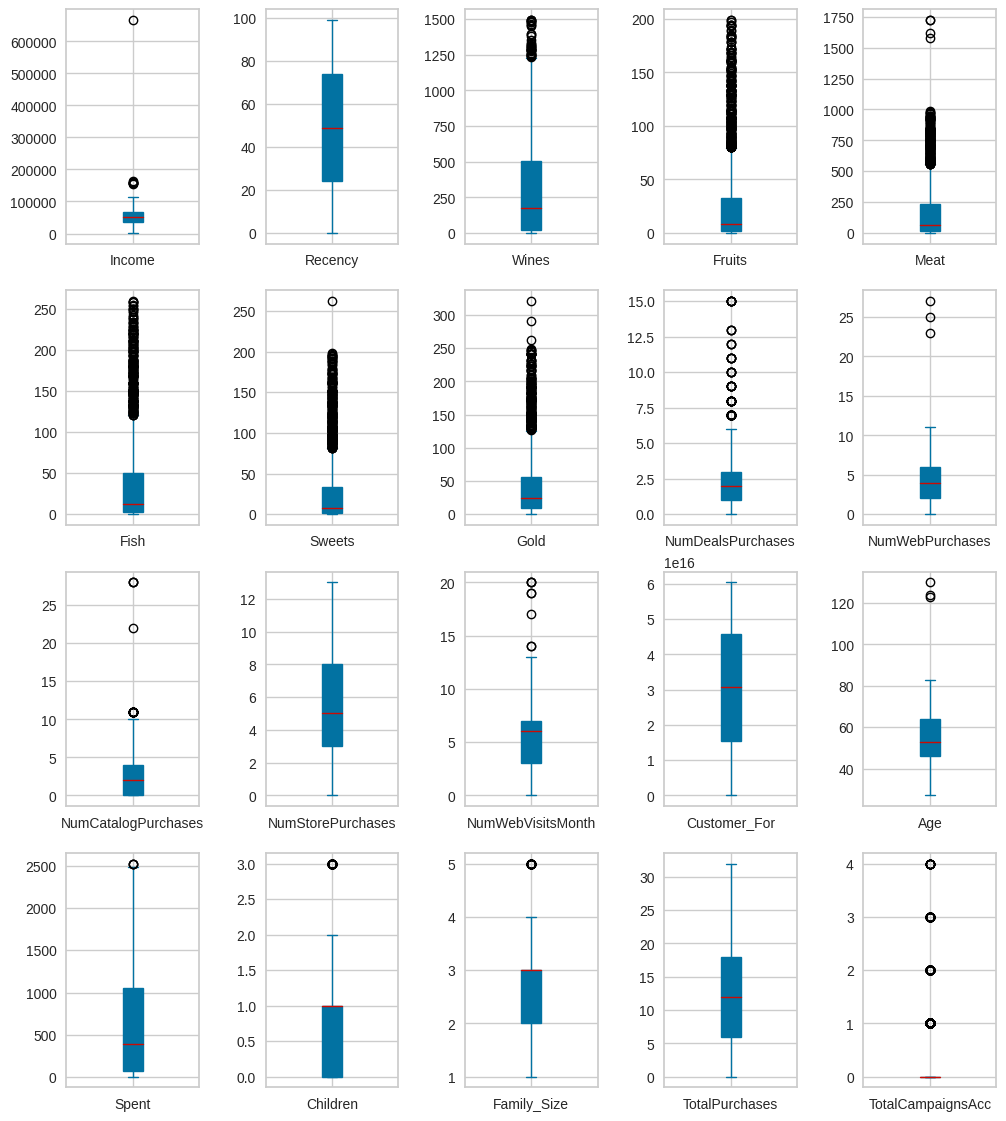

In [19]:
# Seleccionamos las columnas a graficar
df_to_plot = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain','Living_With','Kidhome','Teenhome', 'Is_Parent']).select_dtypes(include=np.number)

# Subplots
df_to_plot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Del gráfico anterior, podemos ver que la columna "Income" tiene outliers.

In [20]:
# Calculamos el IQR para la columna Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identificamos los valores atípicos de esa columna
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Imprimimos la cantidad de outliers
print("Cantidad de outliers en la columna Income:", len(outliers))

Cantidad de outliers en la columna Income: 8


In [21]:
# Removemos los outliers de la columna Income
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [22]:
# Imprimimmos como queda el dataframe
print("Composición del dataframe actualizado:", df.shape)

Composición del dataframe actualizado: (2208, 32)


In [23]:
df.describe().round(2)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,TotalPurchases,TotalCampaignsAcc
count,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,...,2208.00,2208.00,2.208000e+03,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00,2208.00
mean,51633.64,0.44,0.51,49.01,306.10,26.44,165.35,37.76,27.12,44.11,...,0.01,0.15,3.054303e+16,54.19,606.88,0.95,2.59,0.72,12.56,0.30
std,20713.38,0.54,0.54,28.94,337.52,39.84,217.85,54.81,41.12,51.85,...,0.10,0.36,1.750009e+16,11.99,602.09,0.75,0.91,0.45,7.18,0.68
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000000e+00,27.00,5.00,0.00,1.00,0.00,0.00,0.00
25%,35196.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,...,0.00,0.00,1.555200e+16,46.00,69.00,0.00,2.00,0.00,6.00,0.00
50%,51301.00,0.00,0.00,49.00,177.50,8.00,68.00,12.00,8.00,25.00,...,0.00,0.00,3.067200e+16,53.00,397.00,1.00,3.00,1.00,12.00,0.00
75%,68289.75,1.00,1.00,74.00,507.00,33.00,232.00,50.00,34.00,56.25,...,0.00,0.00,4.570560e+16,64.00,1047.25,1.00,3.00,1.00,18.00,0.00
max,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,...,1.00,1.00,6.039360e+16,130.00,2525.00,3.00,5.00,1.00,32.00,4.00


En el cuadro anterior podemos ver que la edad máxima registrada es de 130 años lo cual es llamativo.

Nos quedaremos con aquellos clientes menores a 90 años.

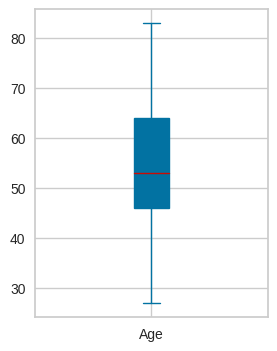

In [24]:
df = df[(df["Age"]<90)]
plt.figure(figsize=(3,4))
df['Age'].plot(kind='box', patch_artist=True);

La cantidad de compras realizadas con descuento debería ser menor que la cantidad de compras totales. Veamos si tenemos registros que no cumplan esta característica:

In [25]:
df["Verifica"] = df["NumDealsPurchases"] <= (df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"])
df2 = df.loc[df["Verifica"] == False]
df2

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalPurchases,TotalCampaignsAcc,Verifica
1042,Graduate,8028.0,0,0,62,73,18,66,7,12,...,56073600000000000,Alone,32,178,0,1,0,1,0,False
1245,Graduate,1730.0,0,0,65,1,1,3,1,1,...,3628800000000000,Alone,52,8,0,1,0,0,0,False
1846,Postgraduate,4023.0,1,1,29,5,0,1,1,1,...,518400000000000,Partner,60,9,2,4,1,0,0,False


Como son solo 3 registros, los eliminamos del dataset:

In [26]:
df["Verifica"] = df["NumDealsPurchases"] <= (df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"])
df = df.loc[df["Verifica"] == True]
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalPurchases,TotalCampaignsAcc,Verifica
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,57283200000000000,Alone,66,1617,0,1,0,22,0,True
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,9763200000000000,Alone,69,27,2,3,1,4,0,True
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,26956800000000000,Partner,58,776,0,2,0,20,0,True
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,12009600000000000,Partner,39,53,1,3,1,6,0,True
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,13910400000000000,Partner,42,422,1,3,1,14,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,32918400000000000,Partner,56,1341,1,3,1,16,0,True
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,1641600000000000,Partner,77,444,3,5,1,15,1,True
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,13392000000000000,Alone,42,1241,0,1,0,18,1,True
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,13478400000000000,Partner,67,843,1,3,1,21,0,True


In [27]:
df = df.drop("Verifica", axis=1)

In [28]:
df.shape

(2202, 32)

## Análisis Exploratorio de Datos

In [29]:
#Configuramos los colores de preferencia
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

En el siguiente histograma vemos la distribución del ingreso entre los clientes:

In [30]:
fig0 = px.histogram(df, x="Income", nbins=50)
fig0.show()

<Axes: xlabel='Income', ylabel='Count'>

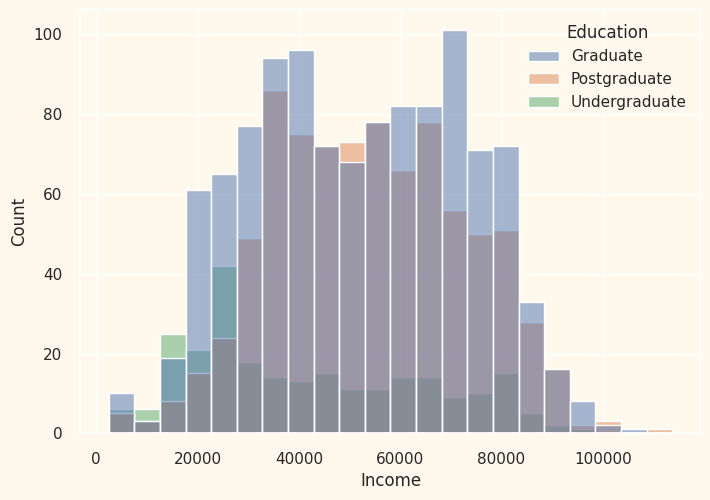

In [31]:
sns.histplot(data = df, x = 'Income', hue = 'Education')

<ipython-input-32-cd51872517c4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

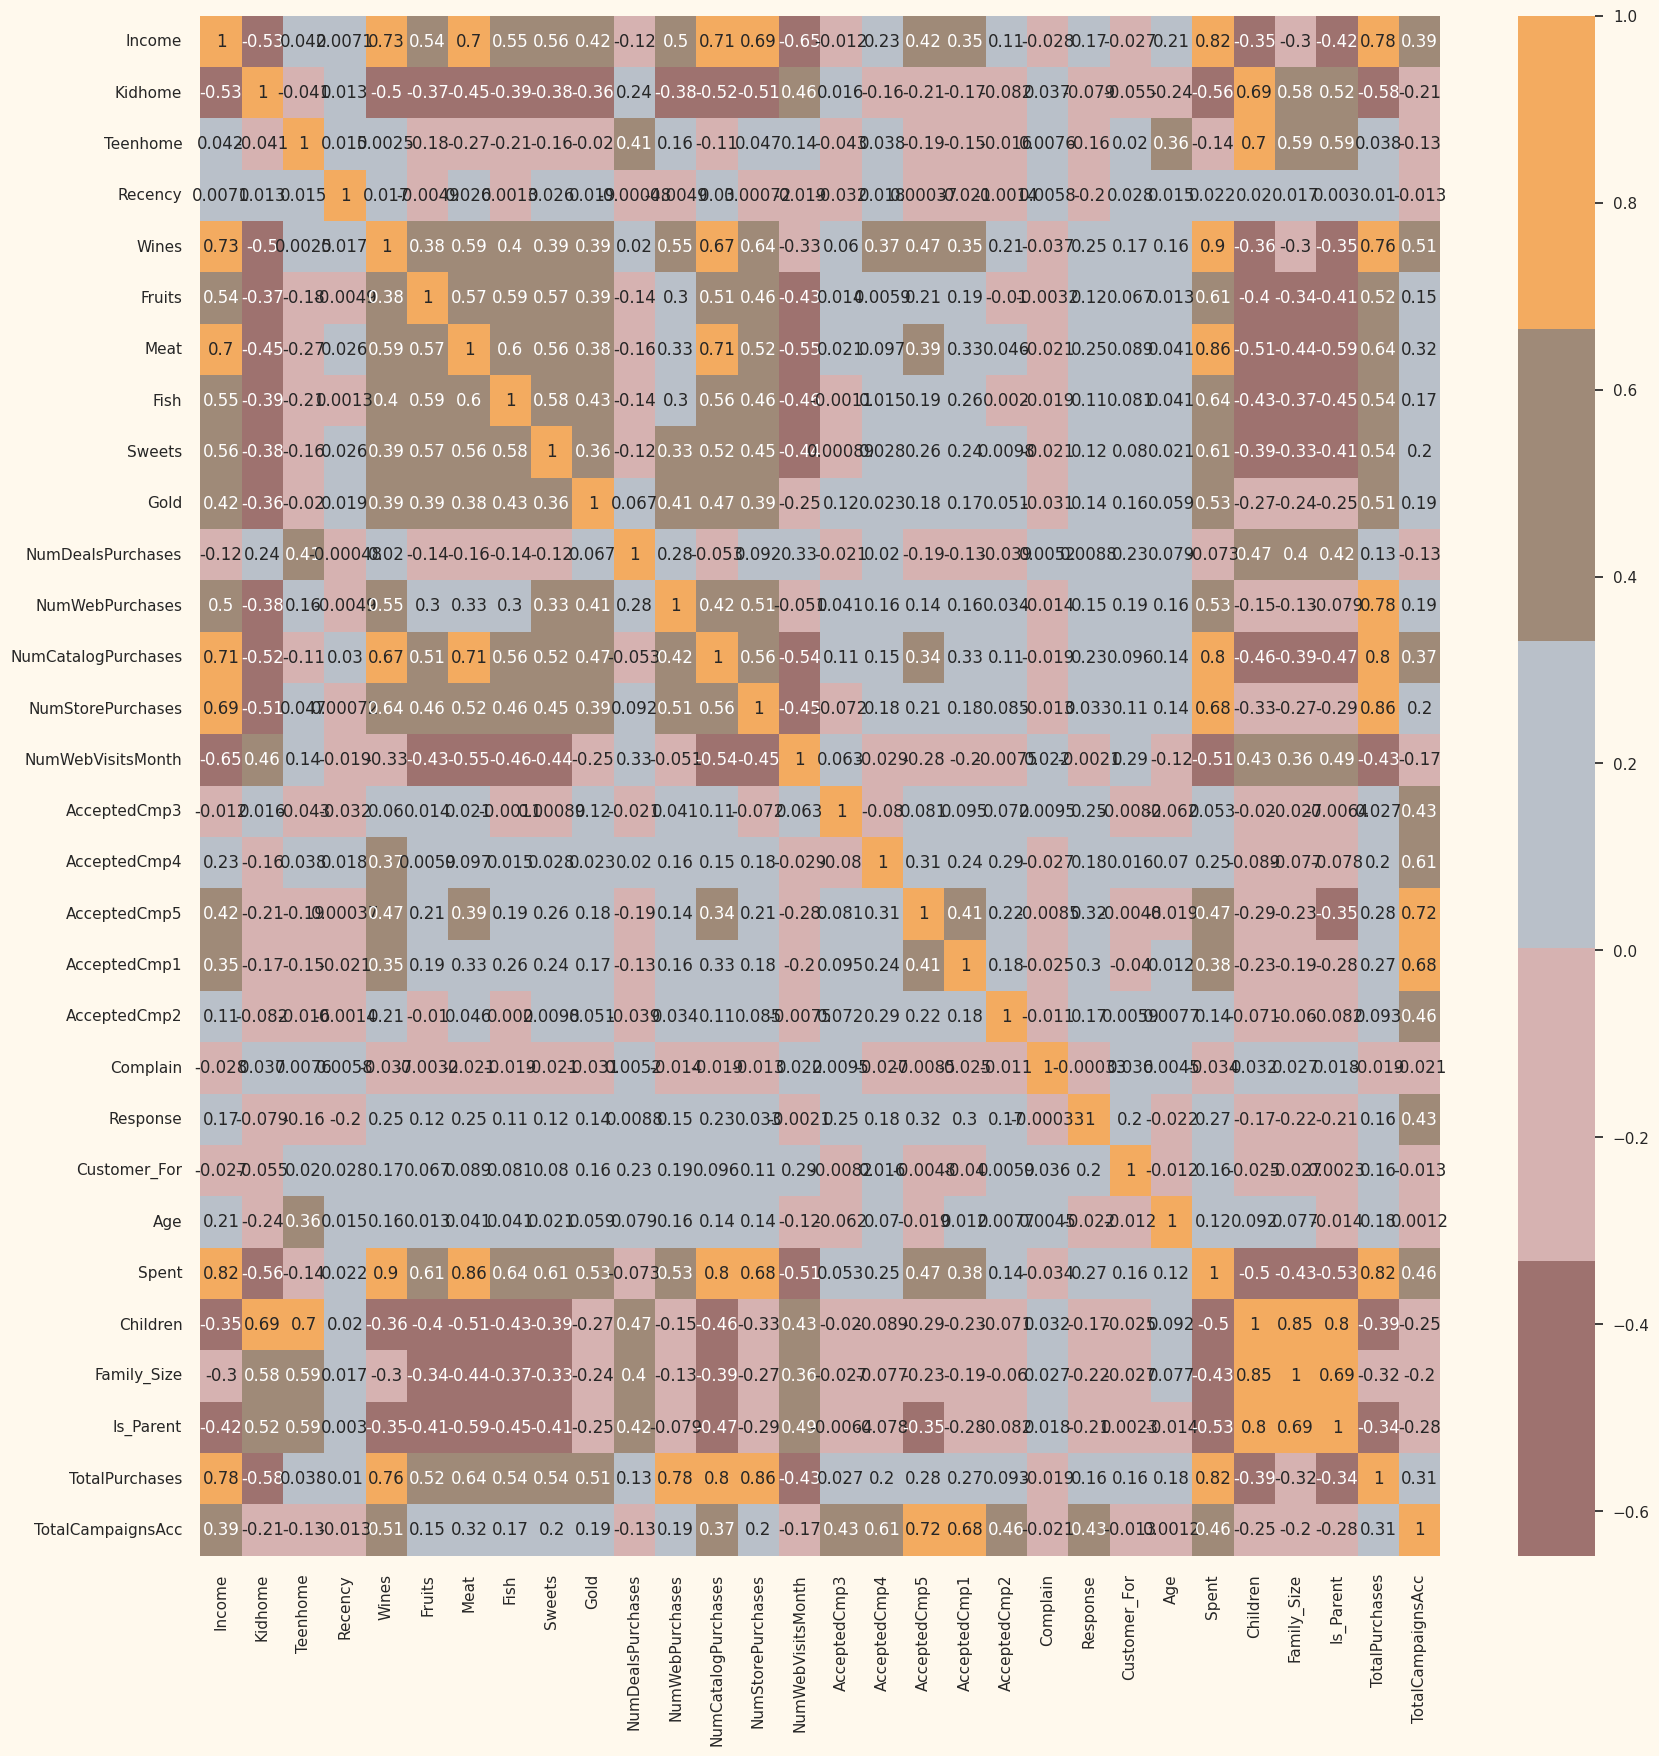

In [32]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Del mapa de calor podemos decir que:
- existe una fuerte correlación entre el ingreso de las personas ("Income") y la cantidad de vino y carne que compran. En consecuencia, también podemos ver que la correlación entre "Spent" e "Income" es aún mayor.
- existe una fuerte correlación entre "Income" y la cantidad de compras por catálogo y en tienda realizadas. La correlación entre "TotalPurchases" e "Income" es fuertemente positiva.
- el monto gastado ("Spent", "Wines", "Fruits", "Meat", "Fish" y "Sweet") y el número de compras ("TotalPurchases" y "NumCatalogPurchases") están correlacionados negativamente con "Children".
- "NumDealsPurchases" está correlacionado positivamente con "Children" y correlacionado negativamente con "Income".
- "AcceptedCmp5" tuvo una correlación positiva con "Income", "Wines", "Meat", "NumCatalogPurchases" y "AcceptedCmp1".
- La cantidad de visitas al sitio web en el último mes ("NumWebVisitsMonth") no tiene correlación lineal con un aumento en la cantidad de ventas por web.
- La cantidad de visitas al sitio web en el último mes tiene correlación positiva moderada con la cantidad de compras con descuento realizadas ("NumDealsPurchases"). Esto sugiere que las ofertas son una manera efectiva de estimular las compras por sitio web.

En el siguiente gráfico vemos que a mayor cantidad de hijos el gasto se reduce.

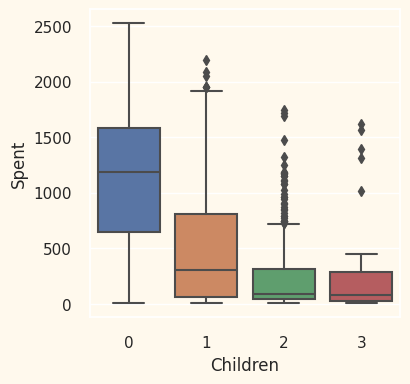

In [33]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='Spent', data=df);

Por el contrario, a mayor cantidad de hijos aumenta la cantidad de compras con descuento:

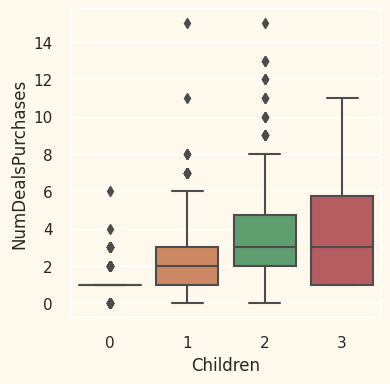

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='NumDealsPurchases', data=df);

El siguiente gráfico muestra el efectivo positivo del ingreso en la aceptación de campañas publicitarias:

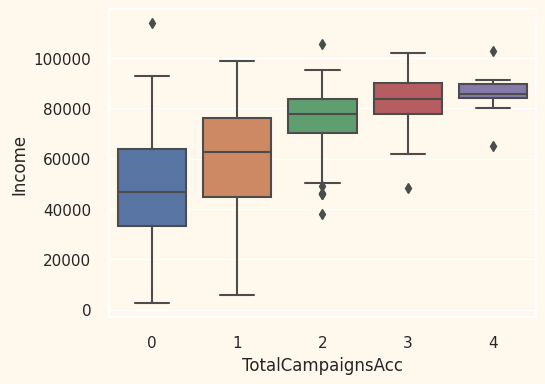

In [35]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df);

In [36]:
# Scatter plot de "NumDealsPurchases" vs "NumWebPurchases"
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumWebPurchases", trendline="ols")
fig25.show()

En el siguiente gráfico vemos que la mayoría de las visitas al sitio web la realizan clientes entre 44 y 55 años.

In [37]:
fig0 = px.histogram(df, x="Age", y="NumWebVisitsMonth", nbins=50)
fig0.show()

## Pre procesamiento de datos

En esta sección realizaremos los siguientes pasos:
- Label encoding de variables categóricas.
- Escalar las features usando Standard Scaler.
- Crear un subset de datos para reducir la dimencionalidad.

In [38]:
# Obtenemos un listado de las variables categóricas
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Variables categóricas en el dataset:", object_cols)

Variables categóricas en el dataset: ['Education', 'Living_With']


Convertimos las variables categóricas en numéricas:

In [39]:
order={"Education":["Undergraduate","Graduate","Postgraduate"],
       "Living_With":["Alone","Partner"]}

for col in object_cols:

  label_encoder = preprocessing.LabelEncoder()

  label_encoder.fit(np.array(order[col]))

  df[col] = label_encoder.transform(df[col])

  print(f"{col}: {df[col].unique()}")

Education: [0 1 2]
Living_With: [0 1]


In [40]:
# Creamos una copia de los datos
ds = df.copy()
# Creamos un subset del dataframe eliminando las features sobre ofertas aceptadas y promociones
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', "Response", "TotalCampaignsAcc"]
ds = ds.drop(cols_del, axis=1)

In [41]:
# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("Todas las features ahora están escaladas")

Todas las features ahora están escaladas


In [42]:
#Datos escalados que se usaran para reducir la dimensionalidad
print("Dataframe que se utilizará para el modelado posterior:")
scaled_ds.head()

Dataframe que se utilizará para el modelado posterior:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Age,Spent,Children,Family_Size,Is_Parent,TotalPurchases
0,-0.892670,0.312448,-0.823576,-0.931106,0.310829,0.973236,1.547187,1.746851,2.447299,1.478866,...,-0.565959,0.713187,1.527909,-1.348874,1.016676,1.677902,-1.267730,-1.762147,-1.586686,1.313049
1,-0.892670,-0.258709,1.038348,0.906077,-0.380285,-0.875726,-0.639046,-0.732290,-0.652944,-0.635847,...,-1.183982,-0.134782,-1.190648,-1.348874,1.273067,-0.965013,1.403601,0.448191,0.630244,-1.197637
2,-0.892670,0.965012,-0.823576,-0.931106,-0.794954,0.353952,0.567151,-0.176779,1.334859,-0.149706,...,1.288108,-0.558766,-0.207024,0.741359,0.332967,0.279983,-1.267730,-0.656978,-1.586686,1.034084
3,-0.892670,-1.212639,1.038348,-0.931106,-0.794954,-0.875726,-0.563659,-0.668016,-0.507051,-0.587233,...,-0.565959,0.289203,-1.062134,0.741359,-1.290843,-0.921795,0.067936,0.448191,0.630244,-0.918672
4,0.570963,0.319954,1.038348,-0.931106,1.554834,-0.395707,0.416376,-0.218098,0.149472,-0.003864,...,0.052063,-0.134782,-0.953392,0.741359,-1.034452,-0.308440,0.067936,0.448191,0.630244,0.197188


## Reducción de la dimensionalidad

En este problema existen muchos factores a partir de los cuales se realizará la clasificación final. Estos factores son básicamente atributos o características. Cuanto mayor sea el número de atributos, más difícil será trabajar con ellas. Muchas de estas características están correlacionadas y, por tanto, son redundantes. Es por eso que realizaremos una reducción de dimensionalidad en las funciones seleccionadas antes de pasarlas por un clasificador.

*La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias consideradas, mediante la obtención de un conjunto de variables principales.*


**El análisis de componentes principales (PCA)** es una técnica para reducir la dimensionalidad de dichos conjuntos de datos, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.


**Pasos en esta sección:**

- Reducción de dimensionalidad con PCA
- Graficar la base de datos reducida



**Reducción de la dimensionalidad con PCA**

Para este proyecto, reduciremos las dimensiones a 3.

In [43]:
#Inicializamos PCA para reducir las dimenciones de las variables a 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2202.0,6.453612e-17,3.025099,-5.584553,-2.760179,-0.772357,2.678750,7.756158
col2,2202.0,-2.581445e-17,1.772456,-4.232173,-1.375923,-0.216147,1.291188,6.273455
col3,2202.0,-6.816628e-17,1.230648,-3.711127,-0.848046,-0.051903,0.875114,3.708463


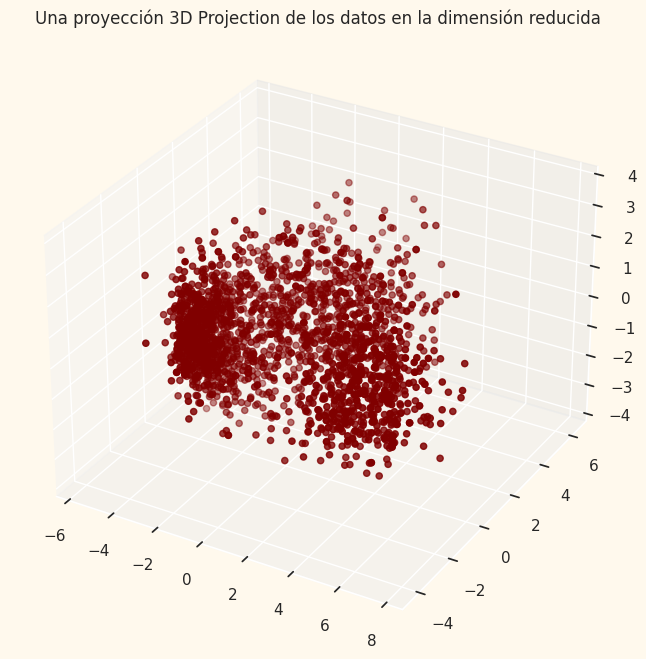

In [44]:
#Presentamos una Proyección 3D de los datos en la dimensión reducida
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Una proyección 3D Projection de los datos en la dimensión reducida")
plt.show()

## Clustering

Existen dos tipos de métodos para hacer **clustering:**

1. Los que permiten obtener una partición directa mediante un algoritmo, entre los cuales el más conocido y utilizado es el K-means.
2. Los que construyen una sucesión de particiones anidadas, que se representan mediante un árbol o dendrograma, se conocen como métodos de clasificación jerárquica. Los más utilizados son los de **clasificación jerárquica aglomerativa**, que parten de todos los individuos, como n clases de un elemento, los que se van uniendo en pasos sucesivos hasta llegar a un solo grupo o clase de n individuos.


Ahora que hemos reducido los atributos a 3 dimensiones, realizaremos clustering por clasificación jerárquica aglomerativa.
Los pasos involucrados en el clustering son:

- Método del Codo para determinar el número de clusters a formar.
- Agrupación mediante agrupación aglomerativa.
- Examinar los grupos formados mediante un diagrama de dispersión.

Método del Codo para determinar el número de clusters a formar:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

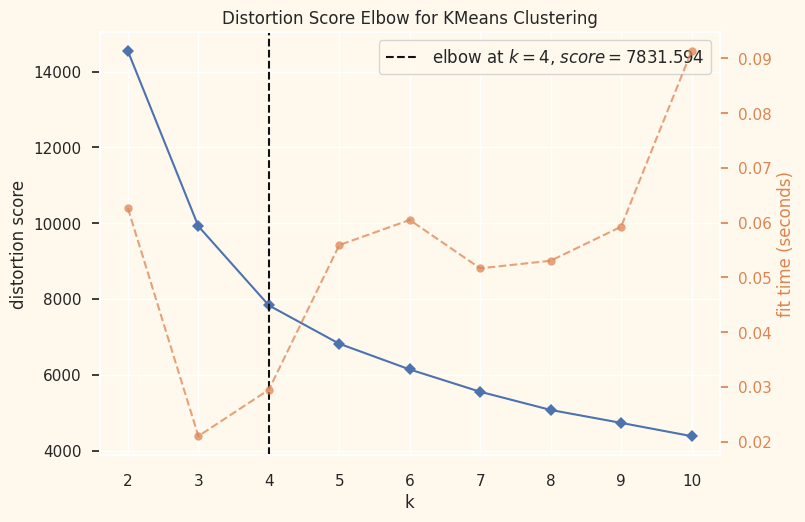

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Realizamos el Método del Codo
print('Método del Codo para determinar el número de clusters a formar:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

El gráfico anterior indica que 4 será el número óptimo de grupos para estos datos. A continuación, ajustaremos el modelo de agrupación aglomerativa para obtener los grupos finales.

In [46]:
#Iniciando el modelo de Clustering Aglomerativo
AC = AgglomerativeClustering(n_clusters=4)
# fiteamos el modelo y predecimos los grupos
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Agregamos los grupos como feature al dataset original.
df["Clusters"]= yhat_AC

Para examinar los grupos que se formaron veamos una vista en 3D de la distribución de los grupos.

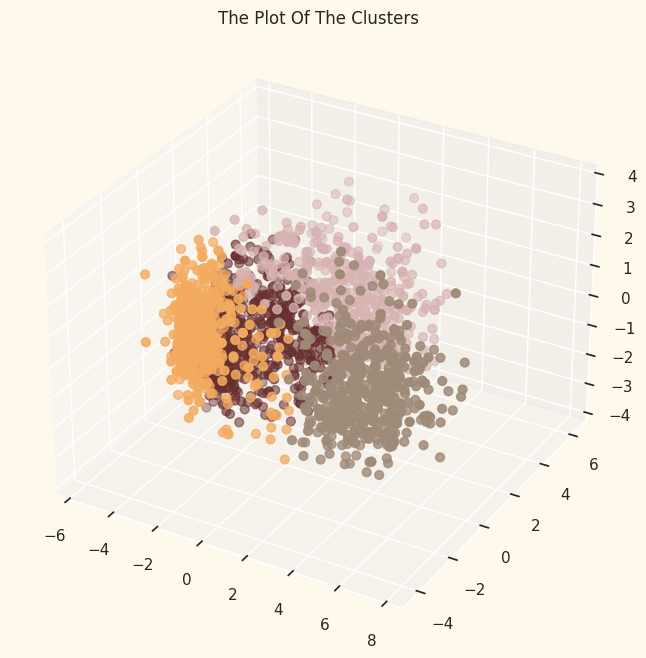

In [47]:
#Graficamos los grupos formados
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [48]:
df.shape

(2202, 33)

## Evaluación de los modelos

Dado que se trata de un aprendizaje no supervisado, no tenemos un atributo etiquetado para evaluar o calificar nuestro modelo. El propósito de esta sección es estudiar los patrones en los grupos formados y determinar la naturaleza de los patrones de los grupos.

Para ello, analizaremos los datos a la luz de los grupos mediante un análisis de datos exploratorio y sacaremos conclusiones.

Primero veamos cómo están distribuidos los grupos.

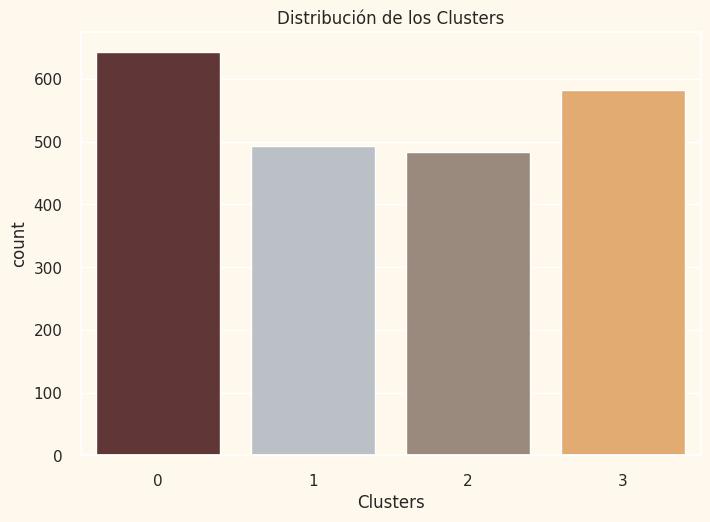

In [49]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribución de los Clusters")
plt.show()

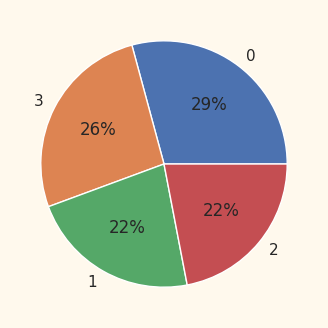

In [50]:
fig,ax = plt.subplots(figsize =(6, 4))
ax.pie(df['Clusters'].value_counts(), labels = df['Clusters'].value_counts().index, autopct='%0.0f%%')
plt.show()

Los grupos parecen estar bien distribuidos, hay una composición balanceada.

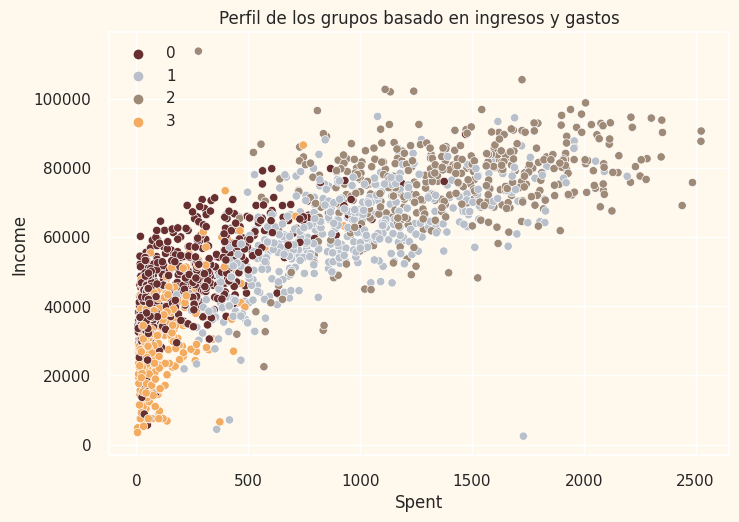

In [51]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Perfil de los grupos basado en ingresos y gastos")
plt.legend()
plt.show()

El gráfico de ingresos vs gastos muestra el patrón de los grupos:

- Grupo 0: ingresos moderados y pocos gastos
- Grupo 1: ingresos moderados o altos y gastos moderados
- Grupo 2: altos ingresos y mucho gasto
- Grupo 3: poco ingreso y pocos gastos

Ahora veamos la distribución de los grupos según los distintos productos del dataset (vinos, frutas, carnes, pescados y productos dorados).

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categori

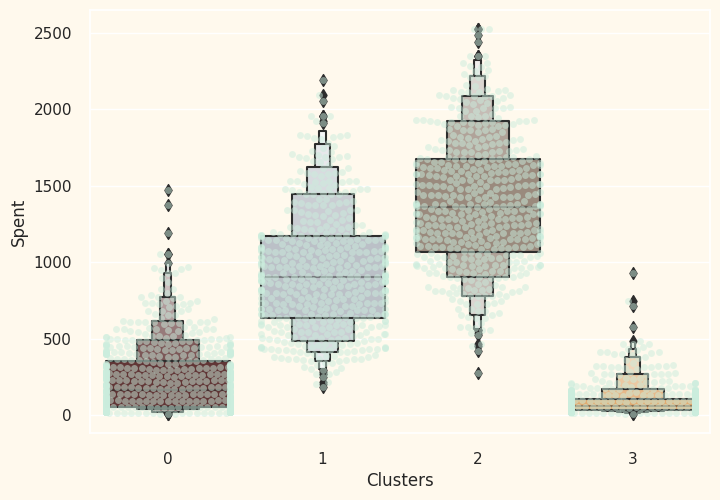

In [52]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

Del gráfico de arriba, podemos ver que el grupo 1 es nuestro mayor set de clientes, seguido por el grupo 1. Podemos explorar en qué gasta cada grupo para las estrategias de marketing específicas.

A continuación, exploremos cómo les fue a las campañas en el pasado.

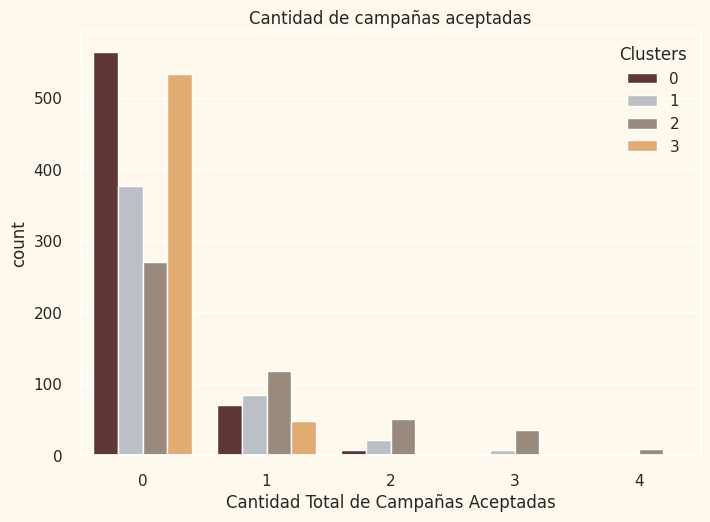

In [53]:
plt.figure()
pl = sns.countplot(x=df["TotalCampaignsAcc"],hue=df["Clusters"], palette= pal)
pl.set_title("Cantidad de campañas aceptadas")
pl.set_xlabel("Cantidad Total de Campañas Aceptadas")
plt.show()

Hasta ahora no ha habido una respuesta contundente a las campañas. Muy pocos participantes en general. Además, nadie aceptó las 5. Quizás se requieran campañas mejor orientadas y mejor planificadas para impulsar las ventas.

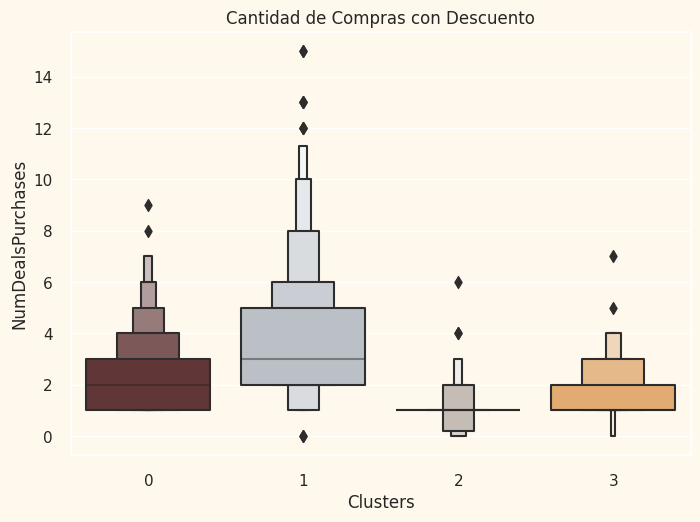

In [54]:
#Graficamos el número de compras con descuento
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Cantidad de Compras con Descuento")
plt.show()

A diferencia de las campañas, las ofertas ofrecidas obtuvieron buenos resultados. El mejor resultado fue con el grupo 0 y el grupo 1. Sin embargo, nuestros clientes estrella del grupo 2 no están muy interesados en las ofertas. Nada parece atraer abrumadoramente al grupo 3.

## Perfil de los clientes

Ahora que formamos los grupos y analizamos sus hábitos de compra, veamos quiénes están en estos grupos. Para ello, perfilaremos los clusters formados y llegaremos a una conclusión sobre quién es nuestro cliente estrella y quién necesita más atención por parte del equipo de marketing de la tienda.

Para decidir, trazaremos algunas de las características que son indicativas de los rasgos personales del cliente a la luz del grupo en el que se encuentra. Sobre la base de los resultados, llegaremos a las conclusiones.

<Figure size 800x550 with 0 Axes>

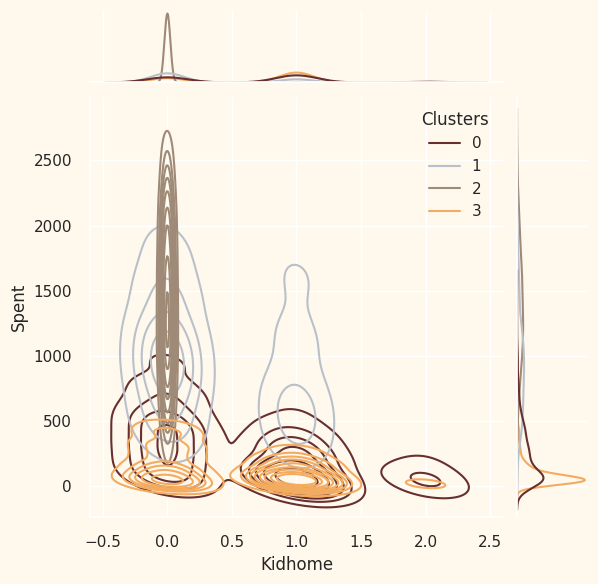

<Figure size 800x550 with 0 Axes>

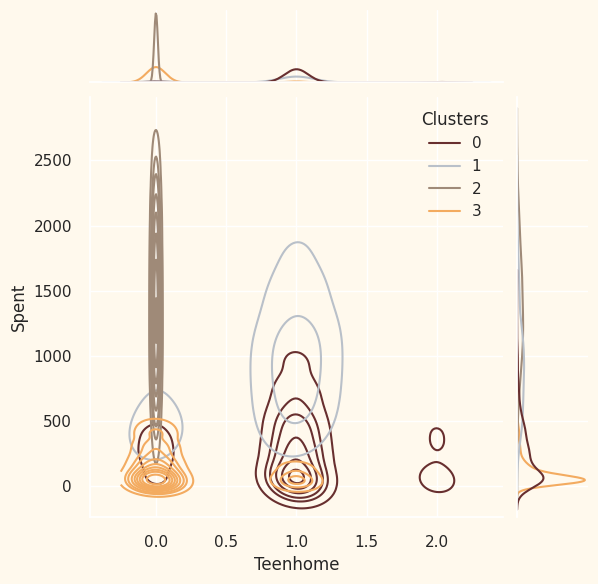

<Figure size 800x550 with 0 Axes>

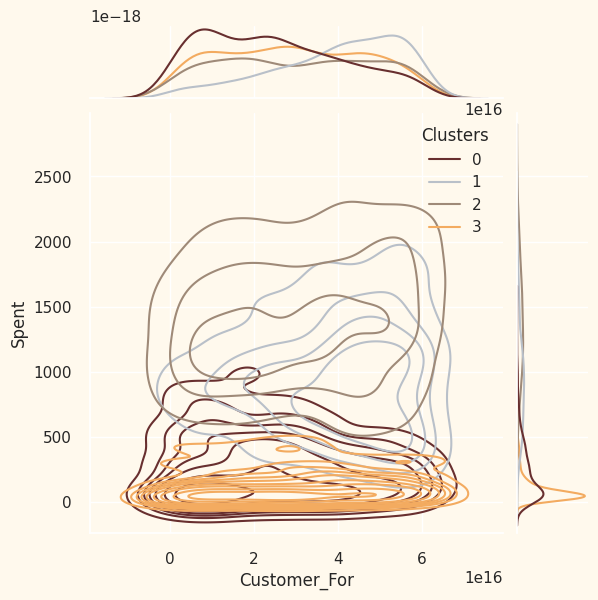

<Figure size 800x550 with 0 Axes>

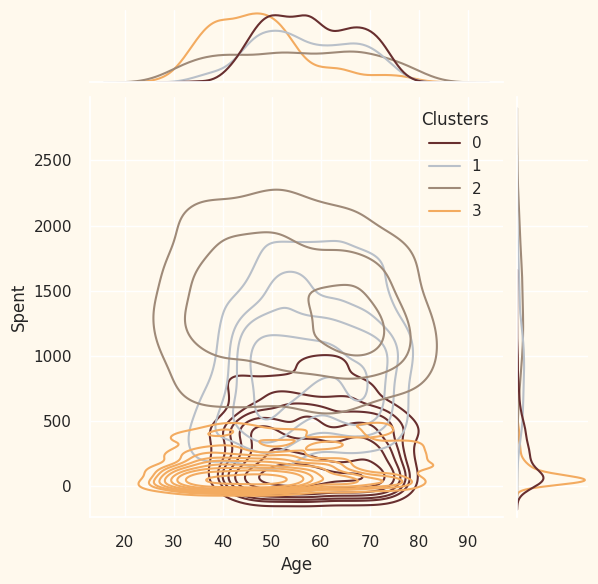

<Figure size 800x550 with 0 Axes>

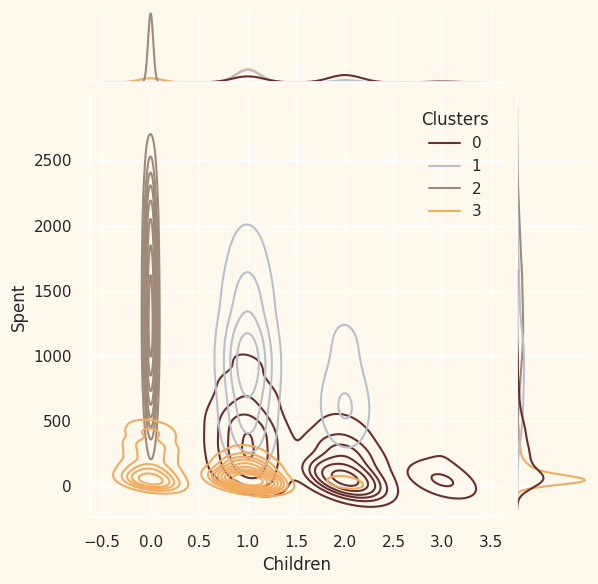

<Figure size 800x550 with 0 Axes>

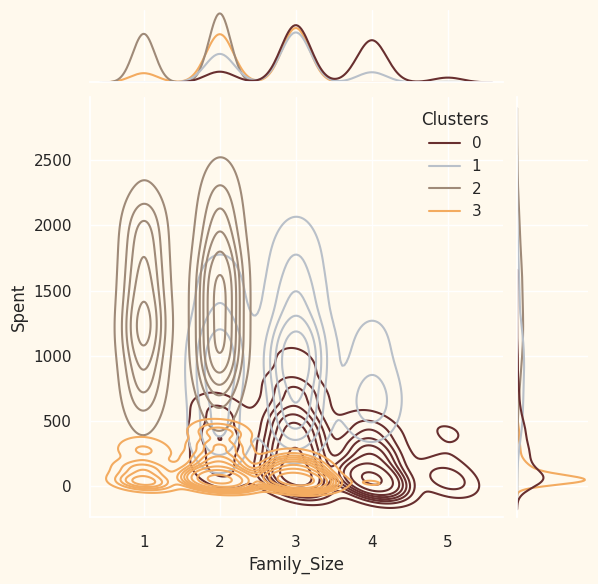

<Figure size 800x550 with 0 Axes>

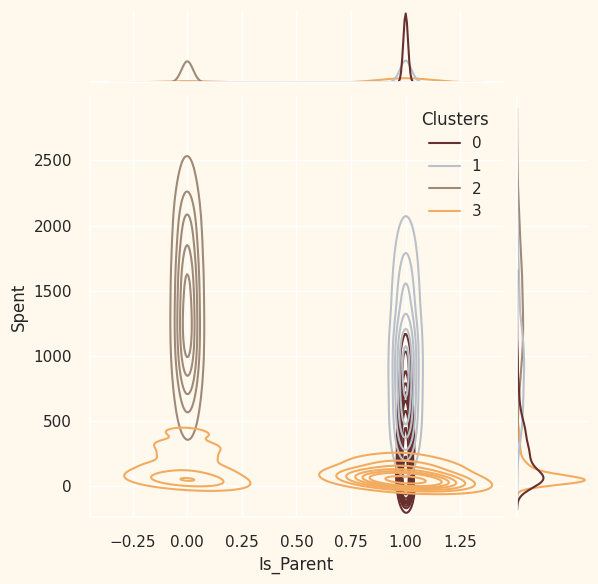

<Figure size 800x550 with 0 Axes>

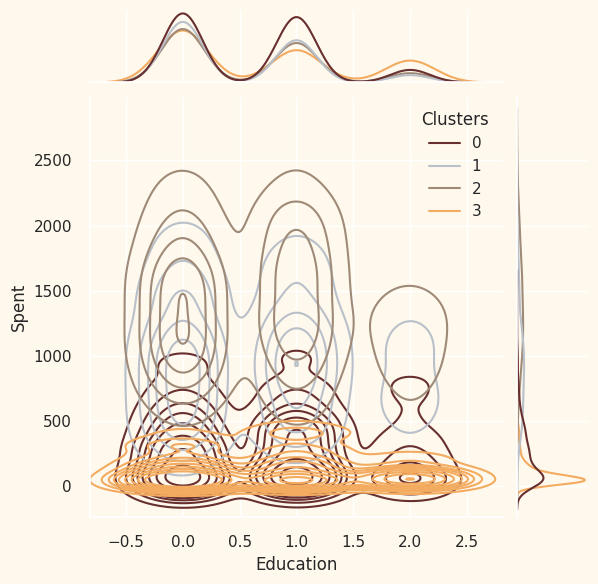

<Figure size 800x550 with 0 Axes>

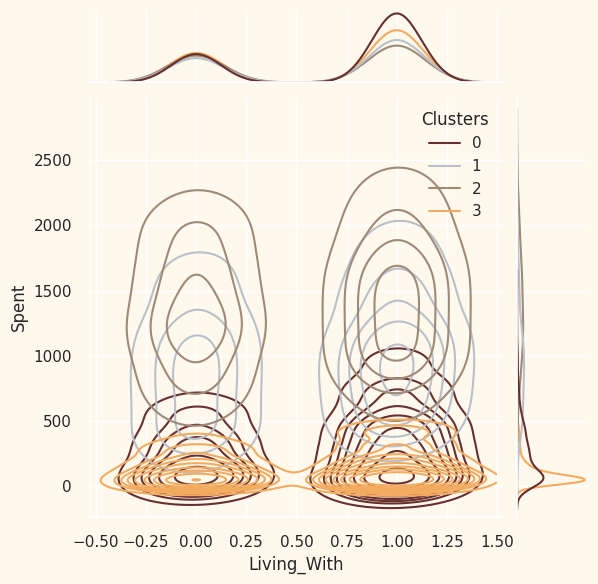

In [56]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

**Perfil de los clientes:**

**Grupo 0:**
- Son padres.
- El grupo familiar es entre 2 y 5 personas.
- Algunos padres están solteros y otros viven con sus parejas.
- Tienen entre 1 y 3 hijos.
- Tienen entre 37 y 80 años.


**Grupo 1:**
- Son padres.
- El grupo familiar es entre 2 y 4 personas.
- Edad entre 30 y 80 años.
- Tienen 1 o 2 hijos.


**Grupo 2:**
- Ninguno tiene hijos.
- Algunos viven con sus parejas.
- Amplio rango etario.
- Es el grupo de mayor ingreso y mayores gastos.


**Grupo 3:**
- La mayoría de este grupo son padres.
- El grupo familiar es entre 1 y 4 personas.
- Amplio rango etareo, los clientes más jóvenes pertenecen a este grupo.
- Como máximo tienen 1 hijo adolescente.
- Como máximo tienen 2 hijos.
- Es el grupo de menor ingreso y que menos gasta.


## Conclusión

En este proyecto, realizamos un método de aprendizaje no supervisado de agrupación en clústeres. Utilizamos reducción de dimensionalidad seguida de agrupación aglomerativa. Detectamos 4 grupos y los utilizamos para perfilar a los clientes en grupos según sus estructuras familiares e ingresos/gastos. Esto se puede utilizar para planificar mejores estrategias de marketing.